In [1]:
### Exploratory Data Analysis(EDA) on Haberman's Dataset

# Data Description

# Age of patient at time of operation (numerical)
# Patient's year of operation (year - 1900, numerical)
# Number of positive axillary nodes detected (numerical)
# Survival status (class attribute)
# 1 = the patient survived 5 years or longer
# 2 = the patient died within 5 year

In [26]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

data = pd.read_csv("haberman.csv",names = ['Age','Op_Year','axil_nodes','Surv_status'])

In [27]:
data.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [28]:
print(data.shape)

(306, 4)


In [29]:
print(data.columns)

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')


In [30]:
data["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

In [31]:
data.isnull().sum()

Age            0
Op_Year        0
axil_nodes     0
Surv_status    0
dtype: int64

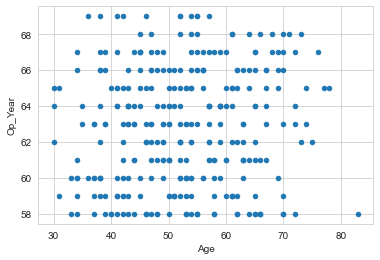

In [32]:
data.plot(kind = "scatter" , x="Age" , y="Op_Year")
plt.show()

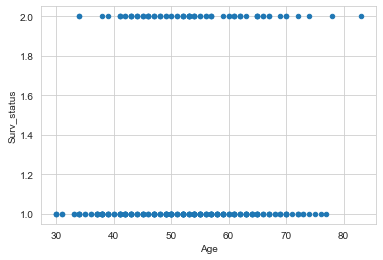

In [33]:
data.plot(kind = "scatter" , x="Age" , y="Surv_status")
plt.show()

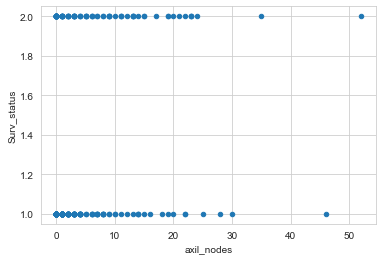

In [34]:
data.plot(kind = "scatter" , x="axil_nodes" , y="Surv_status")
plt.show()

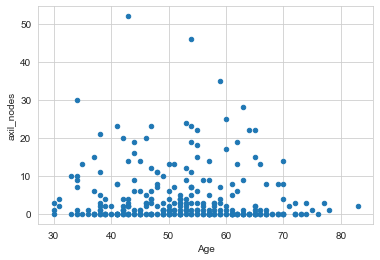

In [35]:
data.plot(kind = "scatter" , x="Age" , y="axil_nodes")
plt.show()

In [36]:
data.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [37]:
#90th percentile
print("\n 90th Percentile \n")
print(np.percentile(data["Age"],90))
print(np.percentile(data["Op_Year"],90))
print(np.percentile(data["axil_nodes"],90))
print(np.percentile(data["Surv_status"],90))


 90th Percentile 

67.0
67.0
13.0
2.0


In [38]:
### Observation
# 90% of patients aged 67
# 90% of patients operation year is 67
# 90% of patients axil nodes detected is 13
# 90% of patients Survival status is 2 (which means they died within 5 years of operation)

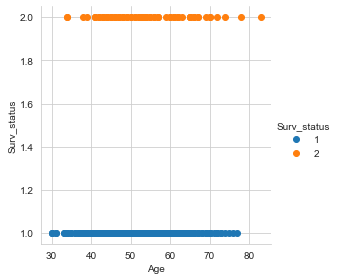

In [39]:
# 2D scatter plot with color coding
sb.set_style("whitegrid")
sb.FacetGrid(data, hue = "Surv_status", height =4) \
  .map(plt.scatter,"Age", "Surv_status") \
  .add_legend()
plt.show()

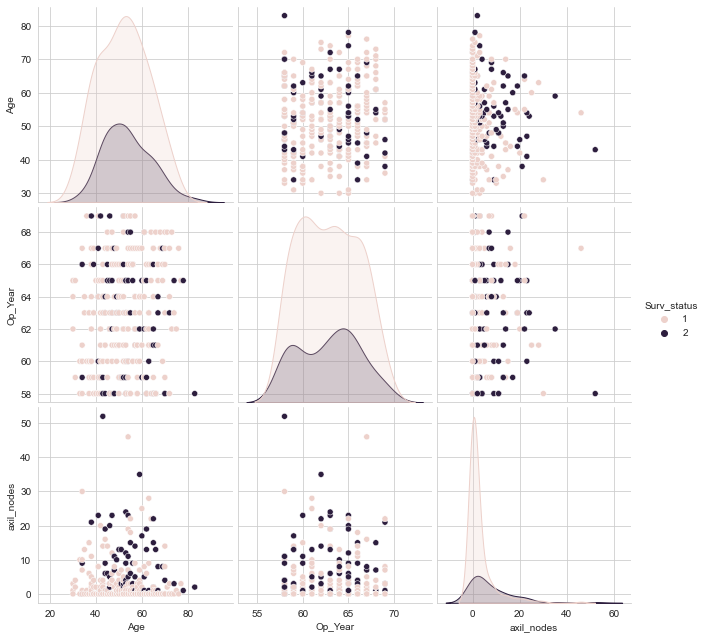

In [40]:
# Pair plot
sb.set_style("whitegrid")
sb.pairplot(data, hue = "Surv_status", height = 3)
plt.show()

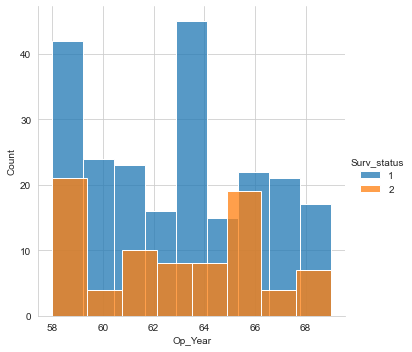

In [41]:
#Univariate analysis of PDF(probability density function)
sb.FacetGrid(data, hue="Surv_status", height = 5) \
  .map(sb.histplot, "Op_Year") \
  .add_legend()
plt.show()

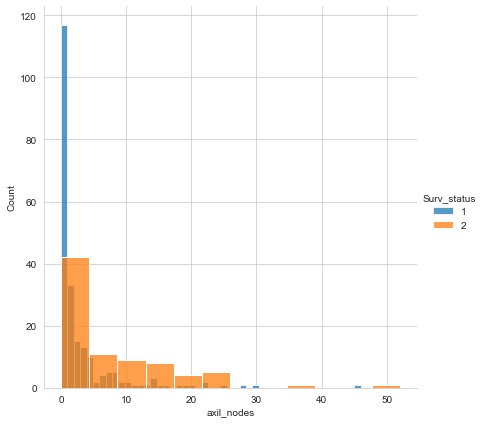

In [43]:
sb.FacetGrid(data, hue = "Surv_status", height = 6) \
  .map(sb.histplot, "axil_nodes") \
  .add_legend()
plt.show()

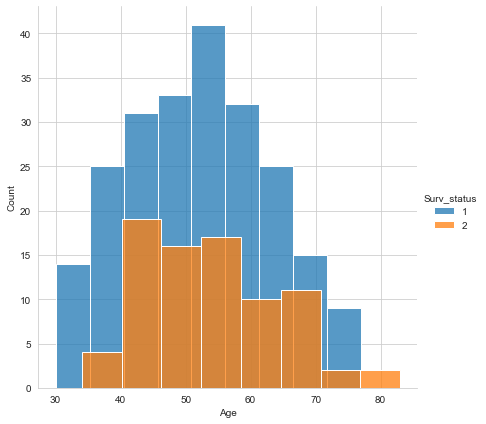

In [44]:
sb.FacetGrid(data, hue ="Surv_status", height = 6) \
  .map(sb.histplot, "Age") \
  .add_legend()
plt.show()

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


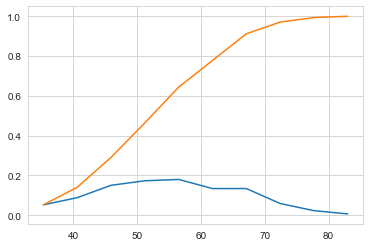

In [49]:
#Probablity Density Function

counts, bin_edges = np.histogram(data['Age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#Cumulative Distribution Function
cdf=np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]


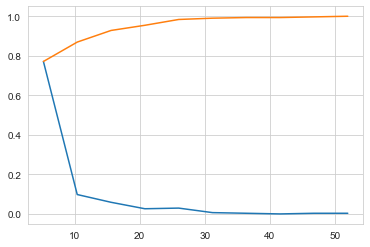

In [50]:
counts, bin_edges = np.histogram(data["axil_nodes"], bins=10, density = True)
pdf = counts/sum(counts)
print(pdf)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

In [ ]:
# Observation

# approx 60% of patients had less than 10 nodes
# No patient survived after 5 yrs of surgery who had more than 30 nodes

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]


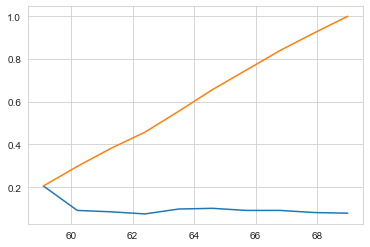

In [52]:
counts, bin_edges = np.histogram(data["Op_Year"], bins=10, density = True)
pdf = counts/sum(counts)
print(pdf)

cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.73529412 0.         0.         0.         0.         0.
 0.         0.         0.         0.26470588]


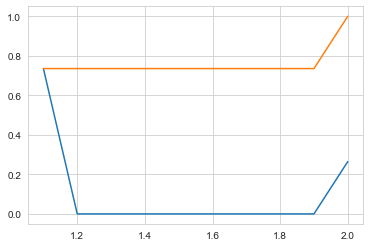

In [53]:
counts, bin_edges = np.histogram(data["Surv_status"], bins=10, density = True)
pdf = counts/sum(counts)
print(pdf)

cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[]

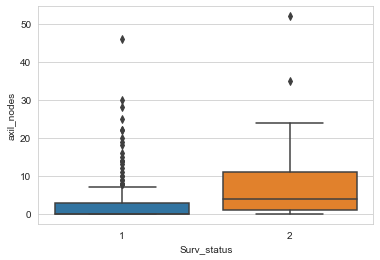

In [55]:
# Box-plot with whiskers
sb.boxplot(x="Surv_status", y="axil_nodes", data = data)
plt.plot()

[]

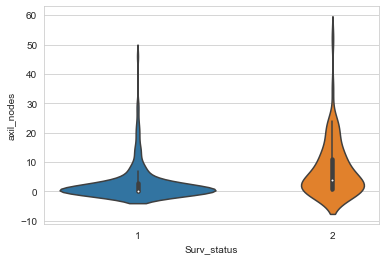

In [56]:
# Violin Plot

sb.violinplot(x="Surv_status", y="axil_nodes", data=data, size = 8)
plt.plot()

[]

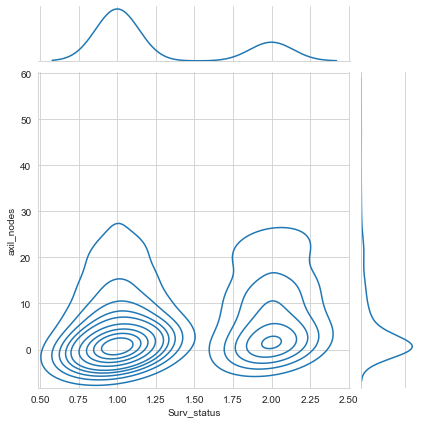

In [57]:
# Multivariate Probability density
# Joint plot
sb.jointplot(x="Surv_status", y="axil_nodes", data=data, kind="kde")
plt.grid()
plt.plot()